In [ ]:
!pip install -q earthengine-api geemap folium rasterio --quiet > /dev/null 2>&1

In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from geemap import Map

In [ ]:
# GEE認証と初期化
try:
    ee.Initialize()
except:
    ee.Authenticate()
    ee.Initialize(project='coral-mode-426910-u5')

In [ ]:
# ERA5データ (2020年7月)
dataset = (ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY_BY_HOUR')
           .filterDate('2020-07-01', '2020-08-01')
           .select('temperature_2m'))

In [ ]:
# 平均気温
avg_temp = dataset.mean()
avg_vis = {
    'min': 273.0,
    'max': 313.0,
    'palette': ['blue', 'green', 'yellow', 'red', 'darkred']
}

m1 = Map(center=[20, 0], zoom=2)
m1.addLayer(avg_temp, avg_vis, 'Average Temperature (K)')
m1

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…

Generating URL ...
Please wait ...
Data downloaded to /content/average_temp_map.tif


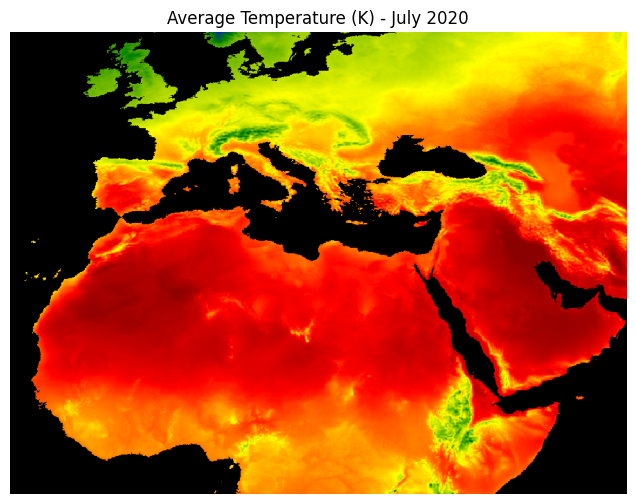

In [ ]:
region = ee.Geometry.BBox(-20, 0, 60, 60)

geemap.ee_export_image(
    avg_temp.visualize(**avg_vis),
    filename='average_temp_map.tif',
    scale=10000,
    region=region.getInfo()
)

with rasterio.open('average_temp_map.tif') as src:
    avg_array = np.moveaxis(src.read([1, 2, 3]), 0, -1)

plt.figure(figsize=(10, 6))
plt.imshow(avg_array)
plt.axis('off')
plt.title('Average Temperature (K) - July 2020')
plt.show()

In [ ]:
# 温度変動
daily_max = dataset.max()
daily_min = dataset.min()
temp_variation = daily_max.subtract(daily_min)

var_vis = {
    'min': 5.0,
    'max': 30.0,
    'palette': ['fff5b1', 'ffdb5c', 'ffa500', 'ff7300', 'ff3300', 'b20000']
}

m2 = Map(center=[20, 0], zoom=2)
m2.addLayer(temp_variation, var_vis, 'Temperature Variation (K)')
m2

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…

Generating URL ...
Please wait ...
Data downloaded to /content/temperature_map.tif


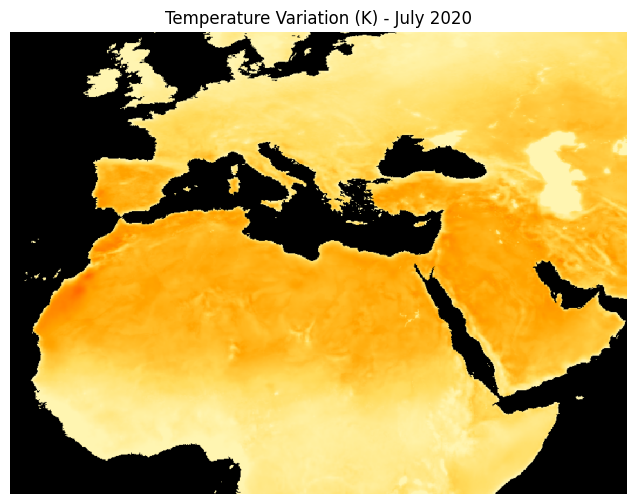

In [ ]:
geemap.ee_export_image(
    temp_variation.visualize(**var_vis),
    filename='temperature_map.tif',
    scale=10000,
    region=region.getInfo()
)

with rasterio.open('temperature_map.tif') as src:
    img_array = np.moveaxis(src.read([1, 2, 3]), 0, -1)

plt.figure(figsize=(10, 6))
plt.imshow(img_array)
plt.axis('off')
plt.title('Temperature Variation (K) - July 2020')
plt.show()